In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data 
mxmh_df = pd.read_csv ('Resources/mxmh_survey_results.csv')


In [2]:
# View index/sort columns
mxmh_df.columns.sort_values()

Index(['Age', 'Anxiety', 'BPM', 'Composer', 'Depression', 'Exploratory',
       'Fav genre', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Hours per day', 'Insomnia', 'Instrumentalist', 'Music effects', 'OCD',
       'Permissions', 'Primary streaming service', 'Timestamp',
       'While working'],
      dtype='object')

In [3]:
# Display data types for reference with building code
mxmh_df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [22]:
# Display columns with null values and how many
mxmh_df1 = mxmh_df.isnull().sum()
mxmh_df1

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [23]:
# Drop rows with null values
mxmh_clean_df = mxmh_df.dropna()
mxmh_clean_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [25]:
row_count = mxmh_clean_df.shape[0]
row_count

616

# Is there a relationship between age and the reported improvement in mental health from listening to music?


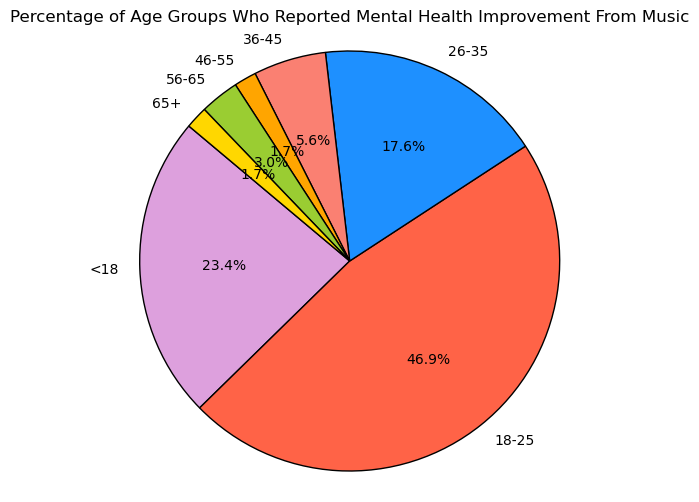

In [6]:

#1 Pie Chart: Percentage of different age demographics who report using music for mental health improvement 
# Define age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Defining the age ranges
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']

mxmh_clean_df = mxmh_clean_df.copy()

# Create a new column 'Age Group' with the age bins
mxmh_clean_df['Age Group'] = pd.cut(mxmh_clean_df['Age'], bins=bins, labels=labels, right=False)

# Filter dataset to include only rows where 'Music effects' is 'Improve'
improvement_mxmh_df = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve']

# Count the number of people in each age group who rely on music for mental health improvement
age_group_counts = improvement_mxmh_df['Age Group'].value_counts().sort_index()

custom_colors=['plum', 'tomato', 'dodgerblue', 'salmon', 'orange', 'yellowgreen', 'gold']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'},
        colors=custom_colors)
plt.title('Percentage of Age Groups Who Reported Mental Health Improvement From Music')
plt.axis('equal')
plt.show()

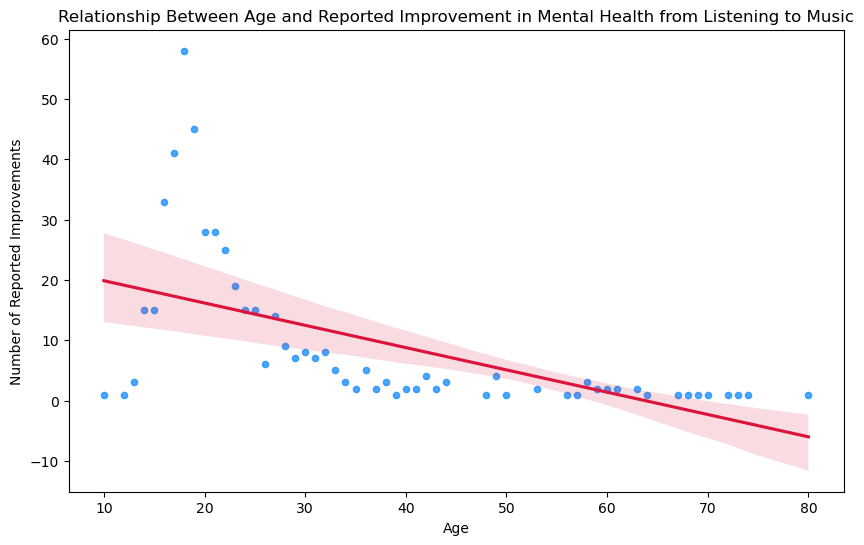

In [7]:
#1: Linear Regression Plot: To visualize the proportion of improvement from music within different age demographics.


# Filter data to include only rows where music improves mental health ('Improve' in 'Music effects')
improve_mxmh_df = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve']

# Calculate the total number of reported improvements for each age
age_improvement_count = improve_mxmh_df.groupby('Age').size().reset_index(name='Improvement Count')

# Plotting the linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Improvement Count', data=age_improvement_count, scatter_kws={'s': 20, 'color':'dodgerblue'}, 
            line_kws={'color': 'crimson'})
plt.title('Relationship Between Age and Reported Improvement in Mental Health from Listening to Music')
plt.xlabel('Age')
plt.ylabel('Number of Reported Improvements')
plt.show()


# What top 5 music genres most affect people’s mental health (worsens, improves, has no effect)?


In [26]:
# Identify columns related to listening frequency

#frequency_columns = [col for col in mxmh_clean_df.columns if 'Frequency' in col]

# Define a mapping for frequency categories to numerical values
# frequency_mapping = {
#    'Never': 0,
#    'Rarely': 1,
#    'Sometimes': 2,
#    'Frequently': 3,
#    'Very frequently': 4
#}

# Convert the frequency columns to numerical values using the mapping
#frequency_df = mxmh_clean_df[frequency_columns].replace(frequency_mapping)

# Explicitly convert to numeric to avoid warnings about downcasting
#frequency_df = frequency_df.astype(float)

# Sum up the frequencies for each genre
#genre_listen_totals = frequency_df.sum().sort_values(ascending=False)

# Display the most listened-to genres
#genre_listen_totals.head()


In [9]:
#find the top 5 genres based on fave genre columns 
top_5_genres = mxmh_clean_df['Fav genre'].value_counts().head()
top_5_genres

Fav genre
Rock                149
Pop                  97
Metal                77
Classical            38
Video game music     36
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

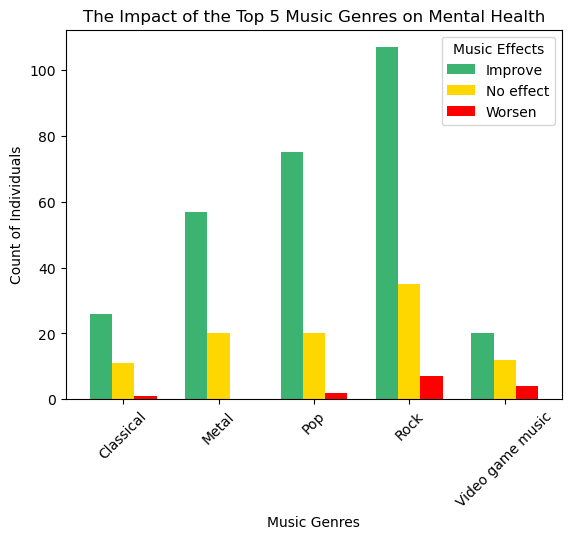

In [10]:
#2 Grouped Bar Chart: Separate bars for each genre showing both positive and negative impacts, with different colors for improvement and worsening effects.

# Filter dataset to include only the top 5 genres and relevant music effects ('Improve', 'Worsen')
filtered_top_5_df = mxmh_clean_df[mxmh_clean_df['Fav genre'].isin(top_5_genres.index) & mxmh_clean_df['Music effects'].isin(['Improve', 'Worsen', 'No effect'])]

# Group by 'Fav genre' and 'Music effects' to get the count for each combination
genre_effect_counts_top5 = filtered_top_5_df.groupby(['Fav genre', 'Music effects']).size().unstack(fill_value=0)

custom_colors=['mediumseagreen','gold','red']

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
genre_effect_counts_top5.plot(kind='bar', width=0.7, color=custom_colors)
plt.title('The Impact of the Top 5 Music Genres on Mental Health')
plt.xlabel('Music Genres')
plt.ylabel('Count of Individuals')
plt.legend(title='Music Effects', loc='upper right')
plt.xticks(rotation=45)
plt.show()

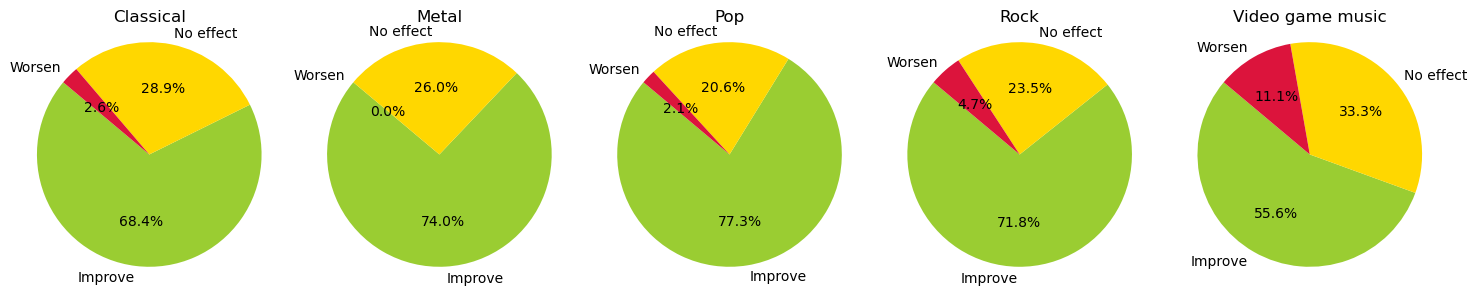

In [11]:
#2 Pie chart: To show the proportion of participants who report positive or negative impacts for each of the top 5 music genres.
filtered_top_5_df = mxmh_clean_df[mxmh_clean_df['Fav genre'].isin(top_5_genres.index) & mxmh_clean_df['Music effects'].isin(['Improve',
'Worsen', 'No effect'])]

# Group by 'Fav genre' and 'Music effects' to get the count for each combination
genre_effect_counts_top5 = filtered_top_5_df.groupby(['Fav genre', 'Music effects']).size().unstack(fill_value=0)

# Plotting a pie chart for each genre
for genre in genre_effect_counts_top5.index:
    # Data for the current genre
    counts = genre_effect_counts_top5.loc[genre]

    custom_colors=['yellowgreen','gold','crimson']
# Create a figure with subplots
fig, axes = plt.subplots(1, len(genre_effect_counts_top5.index), figsize=(15, 3))  # Adjust the figsize as needed

# Plotting a pie chart for each genre
for ax, genre in zip(axes, genre_effect_counts_top5.index):
    # Data for the current genre
    counts = genre_effect_counts_top5.loc[genre]
    
    # Plotting the pie chart on the respective axis
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
    ax.set_title(f'{genre}')
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle

plt.tight_layout()

# Which music genre(s) are often correlated to improving specific mental health issues (anxiety, depression, OCD, & insomnia)?


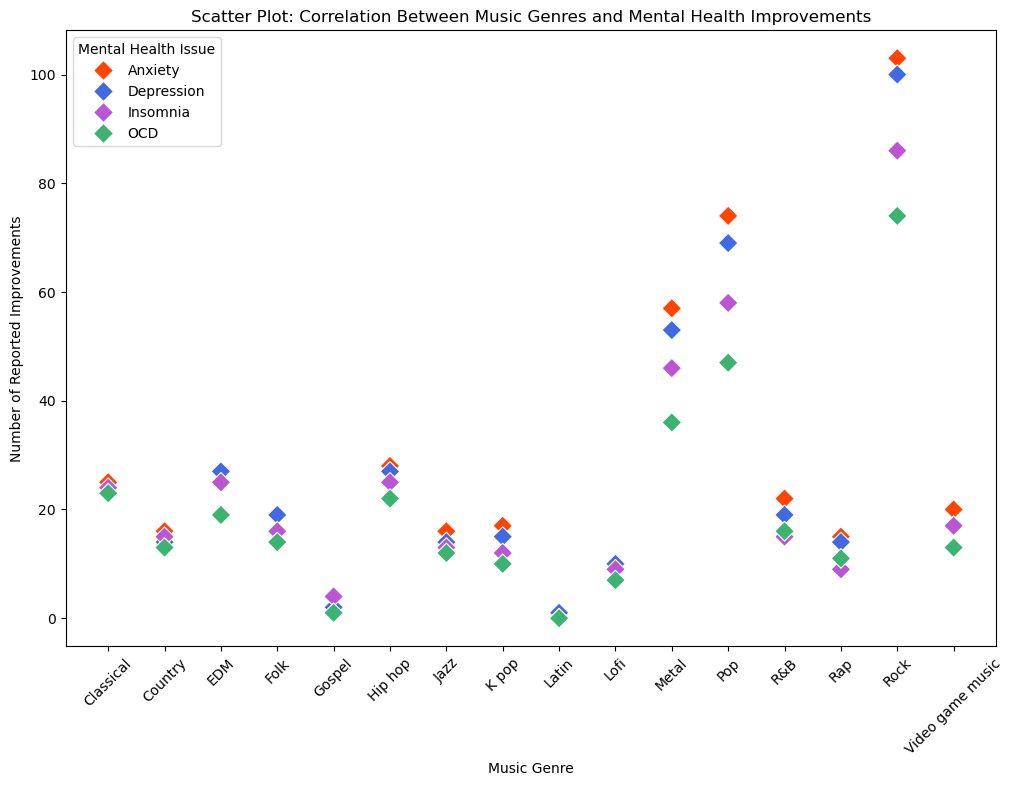

In [34]:
#3 Scatter Plot: To show the correlation between specific music genres and their impact on various mental health issues.


mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Filter the data for participants who reported improvement
improved_genre_data = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve'].copy()

# Convert the severity ratings into binary improvement indicators (1 if reported improvement, 0 otherwise)
for col in mental_health_columns:
    improved_genre_data.loc[:, col] = improved_genre_data[col].apply(lambda x: 1 if x > 0 else 0)

# Count the number of improvements for each genre and mental health issue
genre_mental_health_improvement = improved_genre_data.groupby('Fav genre')[mental_health_columns].sum()

# Melt the pivot table into a long format suitable for scatter plotting
genre_mental_health_long = genre_mental_health_improvement.reset_index().melt(
    id_vars='Fav genre', 
    var_name='Mental Health Issue', 
    value_name='Improvement Count'
)

# Plotting the scatter plot
plt.figure(figsize=(12, 8))

custom_palette = {'Anxiety': 'orangered', 'Depression': 'royalblue', 'Insomnia': 'mediumorchid', 'OCD': 'mediumseagreen'}

# Scatter plot for each genre and its impact on different mental health issues
sns.scatterplot(
    data=genre_mental_health_long, 
    x='Fav genre', 
    y='Improvement Count', 
    hue='Mental Health Issue',
    palette=custom_palette,
    marker='D',
    s=100
)

plt.title('Scatter Plot: Correlation Between Music Genres and Mental Health Improvements')
plt.xlabel('Music Genre')
plt.ylabel('Number of Reported Improvements')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Issue')
plt.show()


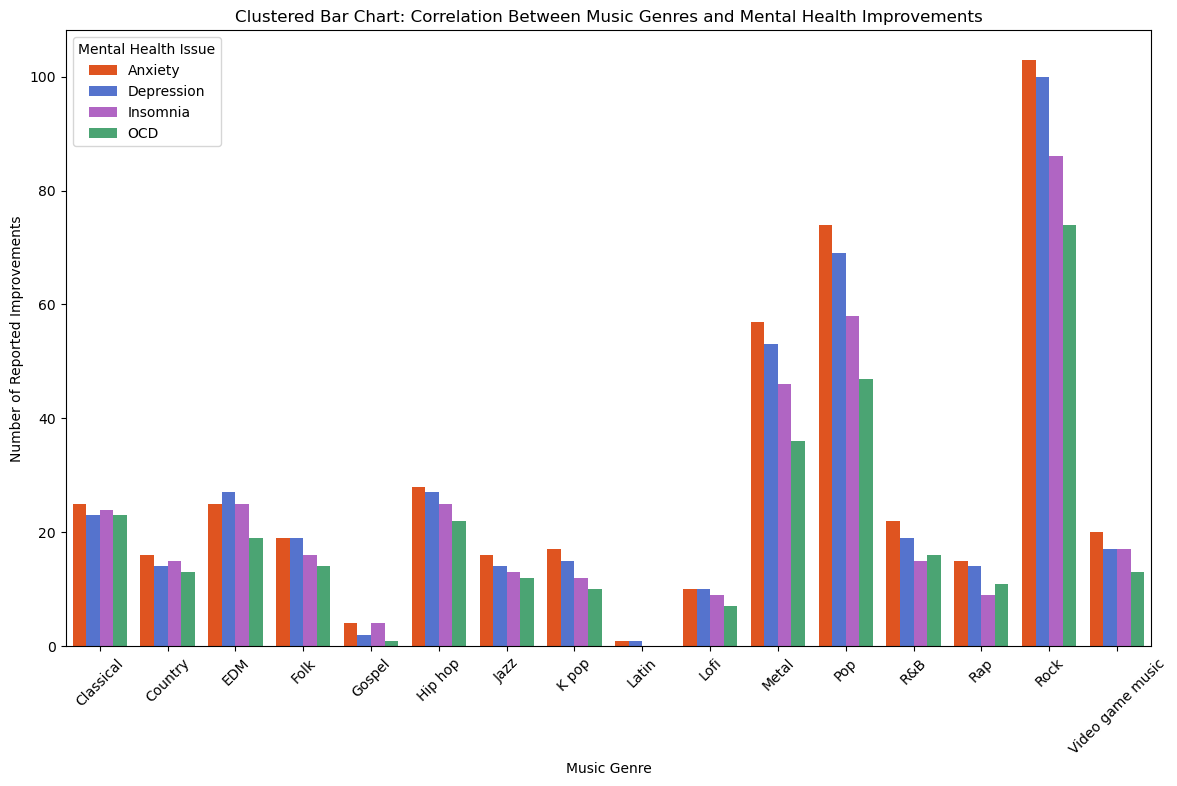

In [35]:
#3 Clustered Bar Chart: To compare the impact of different music genres on various specific mental health issues side by side, allowing for easy comparison within each mental health issue category.

mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Filter the data for participants who reported improvement
improved_genre_data = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve'].copy()

# Convert the severity ratings into binary improvement indicators (1 if reported improvement, 0 otherwise)
for col in mental_health_columns:
    improved_genre_data.loc[:, col] = improved_genre_data[col].apply(lambda x: 1 if x > 0 else 0)

# Count the number of improvements for each genre and mental health issue
genre_mental_health_improvement = improved_genre_data.groupby('Fav genre')[mental_health_columns].sum()

# Melt the pivot table into a long format suitable for clustered bar plotting
genre_mental_health_long = genre_mental_health_improvement.reset_index().melt(
    id_vars='Fav genre', 
    var_name='Mental Health Issue', 
    value_name='Improvement Count'
)

# Plotting the clustered bar chart
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(
    data=genre_mental_health_long,
    x='Fav genre',
    y='Improvement Count',
    hue='Mental Health Issue',
    palette=custom_palette
)

plt.title('Clustered Bar Chart: Correlation Between Music Genres and Mental Health Improvements')
plt.xlabel('Music Genre')
plt.ylabel('Number of Reported Improvements')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Issue')
plt.show()

# What is the average hourly intake of music per day for participants who saw an improvement in mental health?


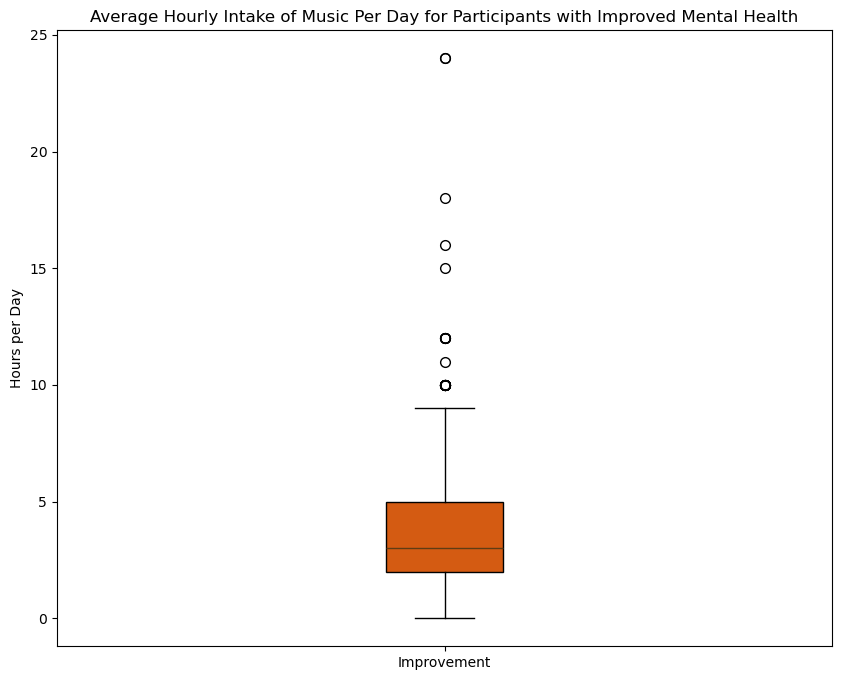

In [14]:
#4 Box Plot: To show the distribution of daily music intake among participants who saw an improvement in mental health.

# Filter the data for participants who saw an improvement in mental health
improved_data = mxmh_clean_df[mxmh_clean_df["Music effects"] == "Improve"]

# Plotting the box plot for average hourly intake of music per day
plt.figure(figsize=(10, 8))
plt.boxplot(improved_data["Hours per day"], patch_artist=True,
            boxprops=dict(facecolor="#D45B12"),
            medianprops=dict(color="#603C14"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker="o", color="#9C2706", markersize=7))

# Label the x-axis with 'Improvement'
plt.xticks([1], ['Improvement'])

plt.title("Average Hourly Intake of Music Per Day for Participants with Improved Mental Health")
plt.ylabel("Hours per Day")
plt.show()

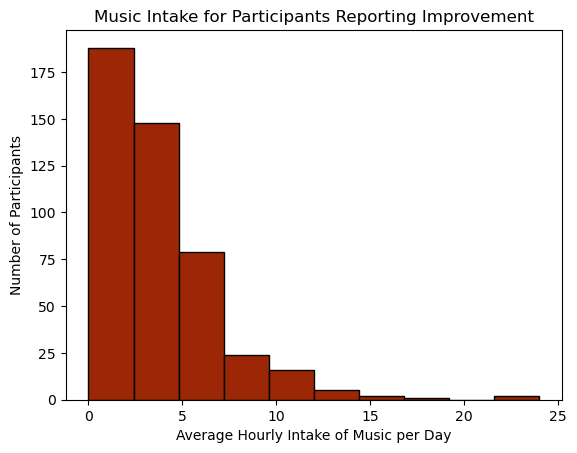

In [15]:
#4 Scatter Plot: Average hourly intake of music per day vs the level of reported mental health improvement to show a trend/correlation in data

# Filter data for participants who reported improvement
improved_data = mxmh_clean_df[mxmh_clean_df["Music effects"] == "Improve"]

# Plot histogram
plt.hist(improved_data['Hours per day'], bins=10, color='#9C2706', edgecolor='black')
plt.xlabel('Average Hourly Intake of Music per Day')
plt.ylabel('Number of Participants')
plt.title('Music Intake for Participants Reporting Improvement')
plt.show()

# In conclusion, does music have a positive or negative affect on mental health?


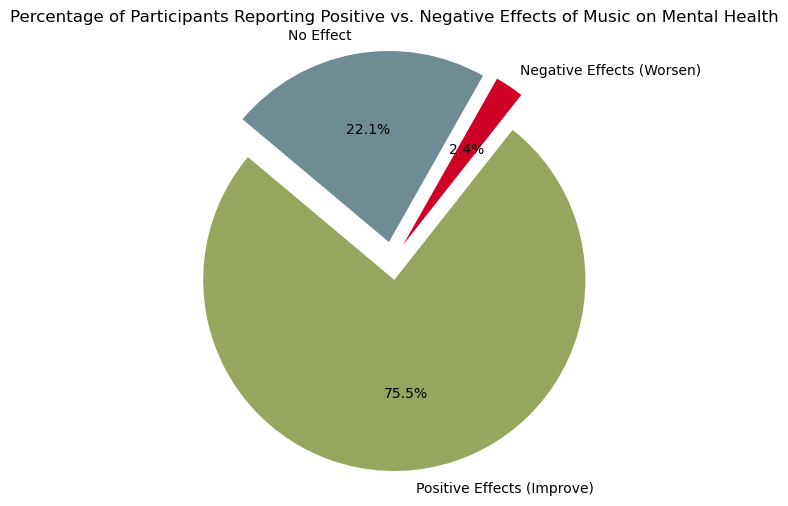

In [16]:
#5 Pie Chart: Percentage of participants who reported positive vs. negative effects.

# Count the number of participants with different music effects
effects_counts = mxmh_clean_df['Music effects'].value_counts()

# Define the categories for the pie chart: positive vs. negative effects
positive_effects = effects_counts.get('Improve', 0)
negative_effects = effects_counts.get('Worsen', 0)
no_effect = effects_counts.get('No effect', 0)

# Pie chart data
labels = ['Positive Effects (Improve)', 'Negative Effects (Worsen)', 'No Effect']
sizes = [positive_effects, negative_effects, no_effect]
colors = ['#97A65F', '#D00127', '#6F8B93']
explode = (0.1, 0.1, 0.1) 

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Participants Reporting Positive vs. Negative Effects of Music on Mental Health')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

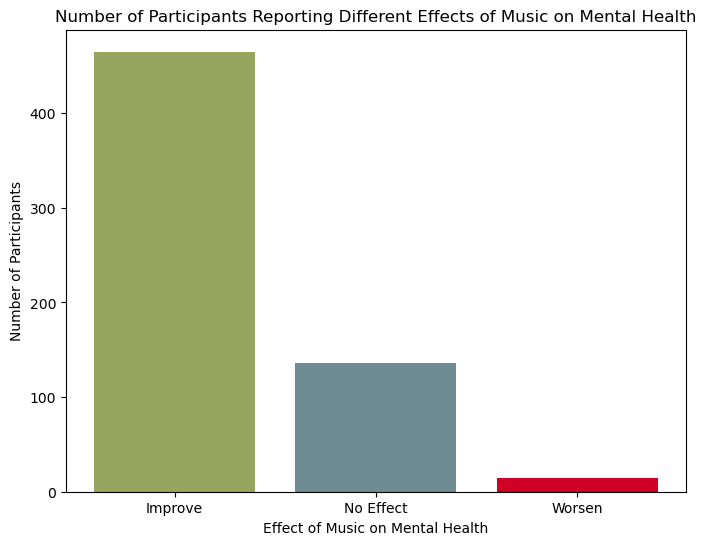

In [17]:
#5 Bar Chart: Number of participants with a breakdown by those reporting improvement, no change, or deterioration in mental health.
effects_counts = mxmh_clean_df['Music effects'].value_counts()

# Extract the counts for each category
positive_effects = effects_counts.get('Improve', 0)      # Number of participants who reported improvement
no_effect = effects_counts.get('No effect', 0)           # Number of participants who reported no change
negative_effects = effects_counts.get('Worsen', 0)       # Number of participants who reported deterioration

# Prepare data for the bar chart
bar_labels = ['Improve', 'No Effect', 'Worsen']
bar_values = [positive_effects, no_effect, negative_effects]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(bar_labels, bar_values, color=['#97A65F', '#6F8B93', '#D00127'])
plt.xlabel('Effect of Music on Mental Health')
plt.ylabel('Number of Participants')
plt.title('Number of Participants Reporting Different Effects of Music on Mental Health')
plt.show()